# Literature Analyses

This notebook analyses the collected and curated literature data for the aperiodic-clinical project. 

In [1]:
from pathlib import Path
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from lisc.plts.words import plot_years

In [2]:
# Import local code
from local.utils import (replace_multi_str, replace_multi_int, replace_other, replace_multi_first,
                         min_count, count_results)
from local.plts import plot_hist, savefig

In [3]:
import seaborn as sns
sns.set_context('paper')

## Settings

In [4]:
# Define figure save path folder
save_folder = Path('./figs/')

In [5]:
# Set the notebook run settings 
SAVE_FIG = True

## Load the Data

In [6]:
# Set the file name
file_foler = Path('../data/')
file_name = 'apc_data.csv'

In [7]:
# Load the data
df = pd.read_csv(file_foler / file_name, skiprows=[0])

In [8]:
# Check the columns
df.columns

Index(['Disorder', 'Authors', 'Year', 'Month', 'DOI', 'Title', 'Journal',
       'Data', 'Analyzed Data', 'Amount of Data', 'Design', 'Analysis',
       '# Patients', 'Patient Ages', '# Control', 'Control Ages', 'Fit Method',
       'Fit Range', 'Report Settings', 'Report GOF', 'Clinical EXP',
       'Control EXP', 'Reported Finding for Aperiodic Exponent',
       'Report Effects Size', 'Effect Size Measure', 'Effects Size',
       'Biomarker', 'Interpretation', 'Notes'],
      dtype='object')

#### Clean up the loaded data

In [9]:
# Drop the null rows
df = df.dropna()

#### Manage column types

In [10]:
# Set years as integers
df['Year'] = df['Year'].astype('int')

In [11]:
# For months - set missing data as '1', and typecast to int
df['Month'].values[df['Month'].values == '-'] = '1'
df['Month'] = df['Month'].astype('int')

#### Participant Numbers

In [12]:
# Replace multiple values per entry with the sum
df = replace_multi_int(df, '# Patients')
df = replace_multi_int(df, '# Control')

In [13]:
# Null out the control counts for reports with no values
df['# Control'].values[df['# Control'] == '-'] = np.nan

In [14]:
# Convert participant number columns to numbers
df['# Patients'] = df['# Patients'].astype('float')
df['# Control'] = df['# Control'].astype('float')

#### Check loaded dataframe

In [15]:
# Check some example rows
df.head(2)

,Disorder,Authors,Year,Month,DOI,Title,Journal,Data,Analyzed Data,Amount of Data,...,Report GOF,Clinical EXP,Control EXP,Reported Finding for Aperiodic Exponent,Report Effects Size,Effect Size Measure,Effects Size,Biomarker,Interpretation,Notes
1,ADHD,Robertson et al,2019,10,10.1152/jn.00388.2019,EEG Power Spectral Slope differs by ADHD statu...,Journal of Neurophysiology,EEG,resting,7m,...,no,1.67 +/- 0.27,1.51 +/- 0.32,⬆︎ clinical vs. control ⬇︎ w medication,yes,eta-squared,0.088,yes,E/I ratio,Are multiple datasets / subsets included and a...
2,ADHD,Pertermann et al,2019,8,10.1016/j.bpsc.2019.03.011,The Modulation of Neural Noise Underlies the E...,Biological Psychiatry: Cognitive Neuroscience ...,EEG,task,1s,...,-,unclear,unclear,⬇︎ clinical vs. control ⬆︎ w medication,no,-,-,no,neural noise,Measurement is a little unclear - is a “neural...


In [16]:
# Check the number of articles
n_articles = len(df)
print('Number of articles: {}'.format(n_articles))

Number of articles: 143


## Disorders

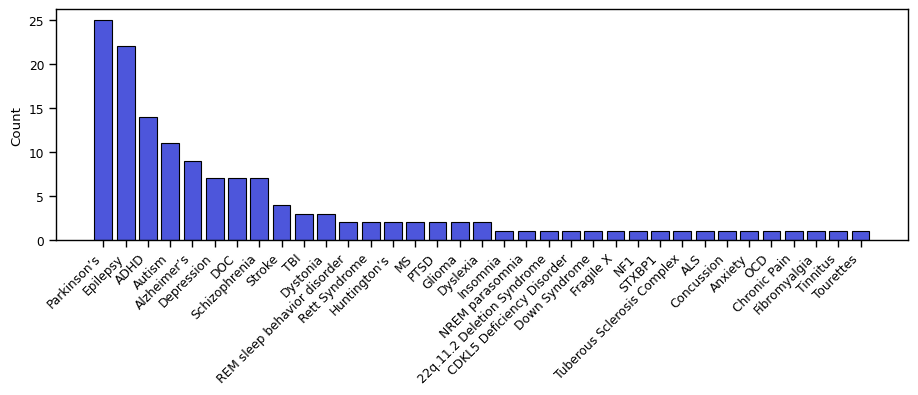

In [17]:
# Plot the histogram of disorders
plot_hist(df, 'Disorder', figsize=(11, 3))

In [18]:
# Compute the disorder counts
disorder_counts = Counter(df['Disorder'])

In [19]:
# Check the number of disorders
n_disorders = len(disorder_counts)
print('Number of disorders: {}'.format(n_disorders))

Number of disorders: 35


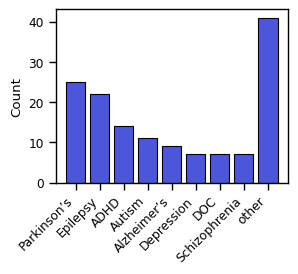

In [20]:
# Plot the histogram of disorders
plot_hist(replace_other(df, 'Disorder', 5), 'Disorder', end_label='other')
savefig(SAVE_FIG, 'reports-disorders.pdf', save_folder)

## Design

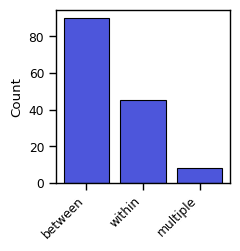

In [21]:
# Plot the histogram of design
tdf = replace_multi_str(df, 'Design')
plot_hist(tdf, 'Design', figsize=(2.25, 2.25))
savefig(SAVE_FIG, 'reports-design.pdf', save_folder)

### Analysis

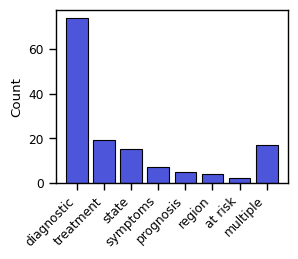

In [22]:
# Plot the histogram of analysis
tdf = replace_multi_str(df, 'Analysis')
plot_hist(tdf, 'Analysis', end_label='multiple')
savefig(SAVE_FIG, 'reports-analysis.pdf', save_folder)

## Publication Data

In [23]:
# Compute the counts per journal
journal_counts = Counter(df['Journal'].values)

In [24]:
n_preprints = journal_counts.pop('preprint')
print('Number of preprints: {}'.format(n_preprints))

Number of preprints: 17


In [25]:
# Check the number of journals
n_journals = len(journal_counts)
print('Number of journals: {}'.format(n_journals))

Number of journals: 77


In [26]:
# Check the most common journals
journal_counts.most_common(12)

[('Brain Communications', 6),
 ('Scientific Reports', 5),
 ('Translational Psychiatry', 4),
 ("NPJ Parkinson's Disease", 4),
 ('Journal of Neurophysiology', 3),
 ('eLife', 3),
 ('Cerebral Cortex', 3),
 ('Molecular Autism', 3),
 ('NeuroImage', 3),
 ('Frontiers in Neurology', 3),
 ('Epilepsia', 3),
 ('European Journal of Neuroscience', 3)]

### Check other values

In [27]:
# Check that publication details are unique values
assert len(set(df['DOI'])) == len(df['DOI'])
assert len(set(df['Title'])) == len(df['Title'])

### Publication Years

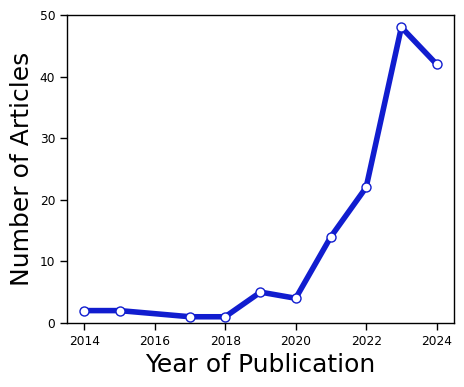

In [28]:
# Plot counts by years
#   Note: in this plot most years are full year, but 2024 is 6 months
year_counts = Counter(df['Year'])
plot_years(year_counts, year_range=[2014, 2024], lw=4, ms=13, color='#111dcf', figsize=(5, 4))

In [29]:
# Create version of years split by 6 months
half_years = df['Year'].values + (df['Month'] > 6) * 0.5
half_year_counter = Counter(half_years)

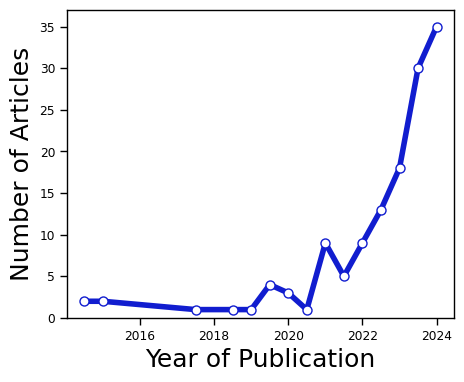

In [30]:
# Plot the reports across years, with 6 month datapoints
plot_years(half_year_counter, year_range=[2014, 2024], lw=4, ms=13, color='#111dcf', figsize=[5, 4])
savefig(SAVE_FIG, 'reports-years.pdf', save_folder)

## Recording Information

### Data Modality

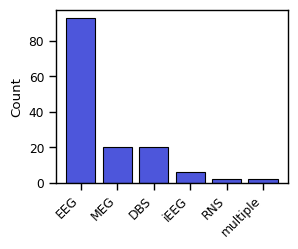

In [31]:
# Plot the histogram of data modalities
tdf = replace_multi_str(df, 'Data')
plot_hist(tdf, 'Data', end_label='multiple')
savefig(SAVE_FIG, 'reports-modalities.pdf', save_folder)

### Analyzed Data

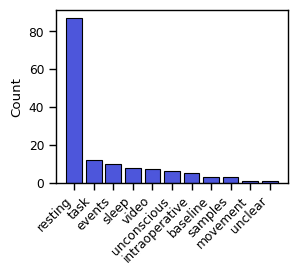

In [32]:
# Plot histogram of analyzed data
plot_hist(df, 'Analyzed Data', end_label='unclear')
savefig(SAVE_FIG, 'reports-analyzed-data.pdf', save_folder)

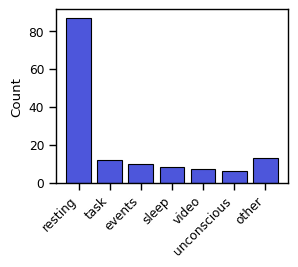

In [33]:
# Plot histogram of analyzed data
plot_hist(replace_other(df, 'Analyzed Data', 6), 'Analyzed Data', end_label='other')
savefig(SAVE_FIG, 'reports-analyzed-data-min.pdf', save_folder)

### Amount of Data

In [34]:
# Get the amount of data for resting state studies
tdf = df[df['Analyzed Data'] == 'resting']
tdf = tdf[tdf['Amount of Data'] != 'unclear']
tdf = replace_multi_first(tdf, 'Amount of Data')
data_lengths = pd.to_timedelta(tdf['Amount of Data'])

In [35]:
# Check the average length of resting state comparisons
print('Number of values: ', len(data_lengths))
print('Median  length: ', data_lengths.median())
print('Minimum length: ', data_lengths.min())
print('Maximum length: ', data_lengths.max())

Number of values:  83
Median  length:  0 days 00:05:00
Minimum length:  0 days 00:00:30
Maximum length:  0 days 00:40:00


In [36]:
# Check number of studies less than specified lengths
for nmin in [1, 2, 3, 4, 5]:
    print('# < {} minute:'.format(str(nmin)), sum(data_lengths < pd.to_timedelta(str(nmin) + 'm')))

# < 1 minute: 1
# < 2 minute: 7
# < 3 minute: 17
# < 4 minute: 33
# < 5 minute: 36


## Dataset Information

In [37]:
# Check total numbers of participants per group
print('Total # patients: {:5d}'.format(int(np.nansum(df['# Patients']))))
print('Total # controls: {:5d}'.format(int(np.nansum(df['# Control']))))

Total # patients:  8892
Total # controls:  5438


In [38]:
# Check the average number of participants per group
print('Average # patients: \t{:1.0f}  +/- {:6.2f} [{:2.0f} - {:4.0f}]'.format(\
    np.nanmedian(df['# Patients']), np.nanstd(df['# Patients']),
    np.nanmin(df['# Patients']), np.nanmax(df['# Patients'])))
print('Average # controls: \t{:1.0f}  +/- {:6.2f} [{:2.0f} - {:4.0f}]'.format(\
    np.nanmedian(df['# Control']), np.nanstd(df['# Control']),
    np.nanmin(df['# Control']), np.nanmax(df['# Control'])))

Average # patients: 	34  +/- 108.19 [ 1 - 1038]
Average # controls: 	35  +/-  88.89 [ 6 -  732]


In [39]:
# Check how many case studies
n_case_studies = len(df[df['# Patients'] == 1])
print('Case studies (n=1): \t {}'.format(n_case_studies))

Case studies (n=1): 	 5


In [40]:
# Check how many large studies there are
for size in [100, 250, 500]:
    print('Studies with n>{}: \t{}'.format(\
        size, len(df[df['# Patients'] >= size])))

Studies with n>100: 	16
Studies with n>250: 	7
Studies with n>500: 	1


In [41]:
# Check the number of patients per diagnosis
rdf = replace_other(df, 'Disorder', 5)
for disorder in set(rdf['Disorder']):
    tdf = rdf[rdf['Disorder'] == disorder]
    print('{:20s} \t {:2.0f}  +/- {:6.2f} [{:2.0f} - {:4.0f}]'.format(\
        disorder, np.nanmedian(tdf['# Patients']), np.nanstd(tdf['# Patients']),
        np.nanmin(tdf['# Patients']), np.nanmax(tdf['# Patients'])))

DOC                  	 49  +/-  80.04 [ 8 -  260]
Alzheimer’s          	 47  +/-  25.68 [36 -  120]
ADHD                 	 68  +/- 253.23 [23 - 1038]
Autism               	 71  +/- 122.99 [15 -  421]
Parkinson’s          	 24  +/-  32.09 [ 7 -  146]
other                	 28  +/-  83.87 [ 1 -  413]
Depression           	  9  +/-  38.67 [ 4 -  119]
Epilepsy             	 18  +/-  63.64 [ 1 -  307]
Schizophrenia        	 36  +/-  15.78 [14 -   58]


In [42]:
# Settings for plotting participant number histograms
brange = [0, 150]
bins = 25
n_hist_settings = {'sort' : False, 'rotate_x' : False, 'remove_xlabel' : False}

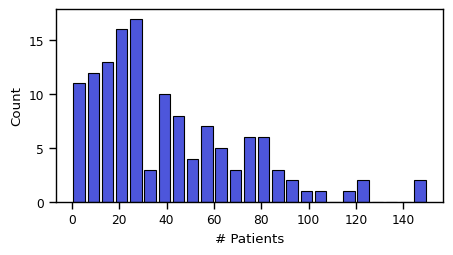

In [43]:
# Plot a histogram of the number of patients
plot_hist(df, '# Patients', figsize=(5, 2.5), binrange=brange, bins=bins, **n_hist_settings)

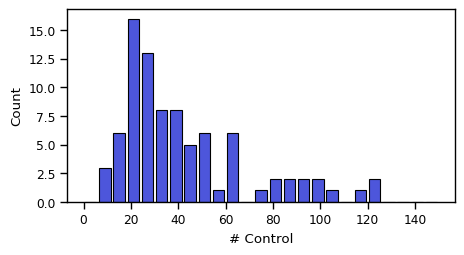

In [44]:
# Plot a histogram of the number of control participants
plot_hist(df, '# Control', figsize=(5, 2.5), binrange=brange, bins=bins, **n_hist_settings)

## Method Information

### Fit Methods

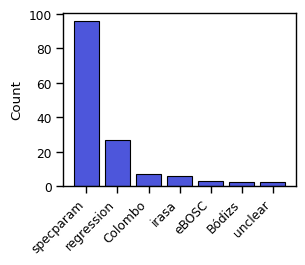

In [45]:
# Plot the histogram of fit methods
plot_hist(df, 'Fit Method', end_label='unclear')
savefig(SAVE_FIG, 'reports-fitmethod.pdf', save_folder)

## Results Information

In [46]:
# Check results counts, per research design
for treatment in ['diagnostic', 'treatment', 'state', 'prognosis', 'symptoms', 'region', 'at risk']:
    print('{:10s}\t'.format(treatment), count_results(df, treatment))

diagnostic	 {'total': 86, 'up': 30, 'down': 27, 'null': 26, 'unknown': 3}
treatment 	 {'total': 25, 'up': 11, 'down': 10, 'null': 4, 'unknown': 0}
state     	 {'total': 17, 'up': 10, 'down': 5, 'null': 0, 'unknown': 2}
prognosis 	 {'total': 11, 'up': 3, 'down': 4, 'null': 2, 'unknown': 2}
symptoms  	 {'total': 10, 'up': 4, 'down': 1, 'null': 3, 'unknown': 2}
region    	 {'total': 7, 'up': 6, 'down': 0, 'null': 0, 'unknown': 1}
at risk   	 {'total': 3, 'up': 3, 'down': 0, 'null': 0, 'unknown': 0}


### Interpretation

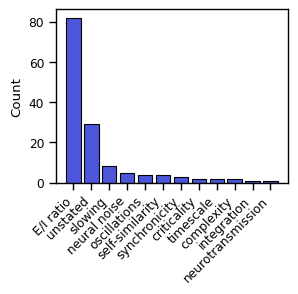

In [47]:
# Plot histogram of interpretations
plot_hist(df, 'Interpretation')
savefig(SAVE_FIG, 'reports-interpretations_all.pdf', save_folder)

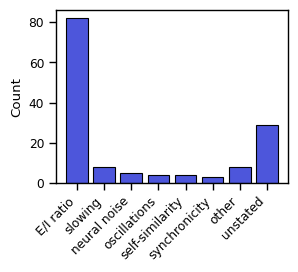

In [48]:
# Plot histogram of interpretations - sub-selected
plot_hist(replace_other(df, 'Interpretation', 3), 'Interpretation', end_label=['other', 'unstated'])
savefig(SAVE_FIG, 'reports-interpretations_min.pdf', save_folder)

### Biomarker

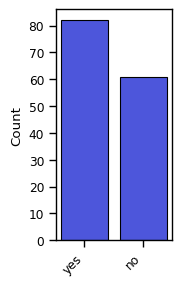

In [49]:
# Plot histogram of biomarker
plot_hist(df, 'Biomarker', figsize=(1.5, 3))
savefig(SAVE_FIG, 'reports-biomarker.pdf', save_folder)

### Report Values

In [50]:
# Get the subset of rows that report a clinical exponent 
dfr = df[np.logical_and(df['Clinical EXP'] != '-', df['Clinical EXP'] != 'unclear')]
len(dfr)

26

### Effect Size

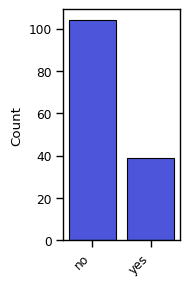

In [51]:
# Plot histogram of effect size
plot_hist(df, 'Report Effects Size', figsize=(1.5, 3))
savefig(SAVE_FIG, 'reports-effectsize.pdf', save_folder)

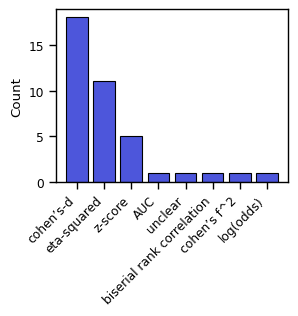

In [52]:
# Plot histogram of effect size - subselected for those that report
dfe = df[df['Effect Size Measure'] != '-']
plot_hist(dfe, 'Effect Size Measure')
savefig(SAVE_FIG, 'reports-effectsize-measures.pdf', save_folder)

## Method Reporting

In [53]:
# Subselect to specparam fitting method
cdf = df[df['Fit Method'] == 'specparam'].copy()

In [54]:
# Compute how many reports report settings & GOF
rep_set = sum(cdf['Report Settings'] == 'yes') / len(cdf)
rep_gof = sum(cdf['Report GOF'] == 'yes') / len(cdf)

In [55]:
print('Reports settings:   {:4.2f}%'.format(rep_set * 100))
print('Reports GOF:        {:4.2f}%'.format(rep_gof * 100))

Reports settings:   56.25%
Reports GOF:        30.21%


In [56]:
# Order values for plotting 
cdf['Report Settings'] = pd.Categorical(cdf['Report Settings'], ['yes', 'no'])
cdf['Report GOF'] = pd.Categorical(cdf['Report GOF'], ['yes', 'no'])

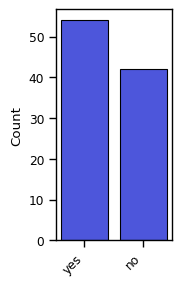

In [57]:
# Plot settings reporting
plot_hist(cdf, 'Report Settings', figsize=(1.5, 3))

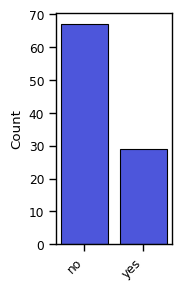

In [58]:
# Plot GOF reporting
plot_hist(cdf, 'Report GOF', figsize=(1.5, 3))